<a href="https://colab.research.google.com/github/lcbjrrr/ML315/blob/main/ML315_11_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Timeseries: ARIMA (Autoregressive Integrated Moving Average)

A time series is a sequence of data points collected over time, typically at equally spaced intervals. It's used to analyze trends, seasonality, and other patterns in data that evolve over time. Autoregressive Integrated Moving Average (ARIMA) is a popular statistical method for time series forecasting. It models the relationship between an observation and a combination of past observations (autoregressive), past forecast errors (moving average), and the differencing of raw observations to make the time series stationary (integrated). ARIMA models are powerful for capturing complex temporal dependencies in data.

In [1]:
import pandas as pd
solar = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/ML315/refs/heads/main/datasets/Sunspots.csv')
solar.head(2)

,Date,Sunspot
0,1749-01-31,96.7
1,1749-02-28,104.3


In [5]:
solar.index = solar['Date']
solar = solar.drop(columns=['Date'])
solar.head()

,Sunspot
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7


<Axes: xlabel='Date'>

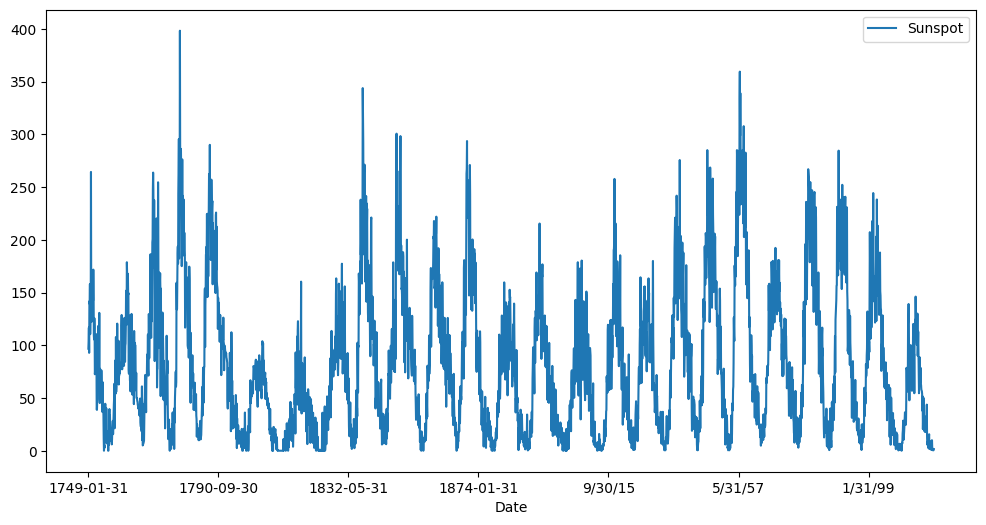

In [6]:
solar.plot(figsize=(12,6))

## Stationary time series

A stationary time series is one whose statistical properties, such as mean, variance, and autocorrelation, remain constant over time. In simpler terms, a stationary series doesn't exhibit trends or seasonality. Many time series models, including ARIMA, assume stationarity. If a time series is not stationary, it can often be made stationary through techniques like differencing, which involves calculating the difference between consecutive data points.

In [7]:
from statsmodels.tsa.stattools import adfuller
adfuller(solar['Sunspot'])

(np.float64(-10.480868432669846),
 np.float64(1.214714158650459e-18),
 28,
 3223,
 {'1%': np.float64(-3.4323805665026175),
  '5%': np.float64(-2.8624371819849372),
  '10%': np.float64(-2.5672475896829807)},
 np.float64(29726.17960863342))

This is the p-value. A very small p-value (typically less than 0.05) suggests that the time series is likely stationary. In this case, the p-value is extremely small, indicating strong evidence against the null hypothesis of non-stationarity.

## Non-Stationary time series

A non-stationary time series is one where the statistical properties like mean, variance, or autocorrelation change over time. This means it might have trends, seasonality, or other patterns that make it unpredictable without transformation.

In [8]:
shampoo = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/ML315/refs/heads/main/datasets/shampoo.csv')
shampoo.head(2)

,Month,Sales
0,1-01,266.0
1,1-02,145.9


In [10]:
shampoo.index = shampoo['Month']
shampoo= shampoo.drop(columns=['Month'])
shampoo.head()

,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


<Axes: xlabel='Month'>

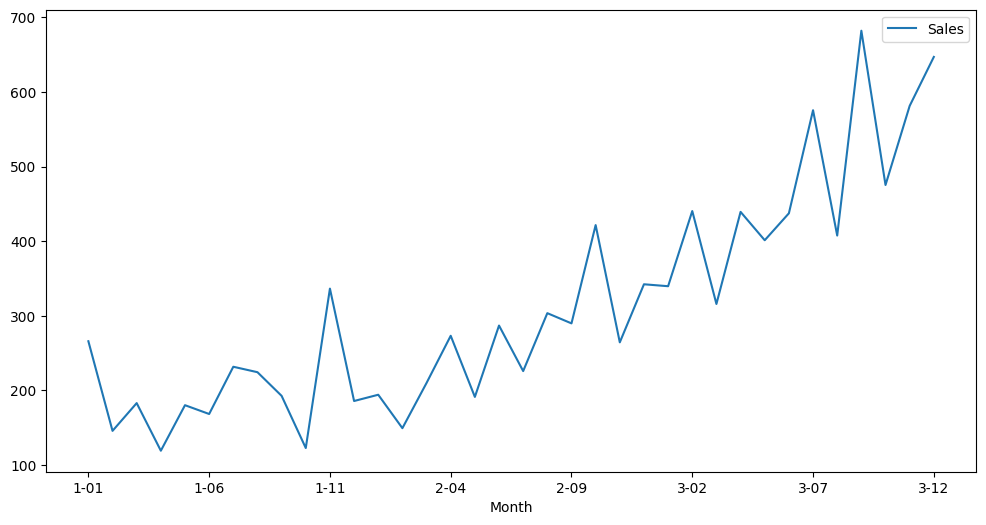

In [12]:
shampoo.plot(figsize=(12,6))

In [13]:
adfuller(shampoo['Sales'])

(np.float64(3.060142083641181),
 1.0,
 10,
 25,
 {'1%': np.float64(-3.7238633119999998),
  '5%': np.float64(-2.98648896),
  '10%': np.float64(-2.6328004)},
 np.float64(278.99726442630316))

A large p-value (greater than 0.05) suggests that the time series is likely non-stationary. In this case, a p-value of 1.0 strongly indicates non-stationarity.

<Axes: xlabel='Month'>

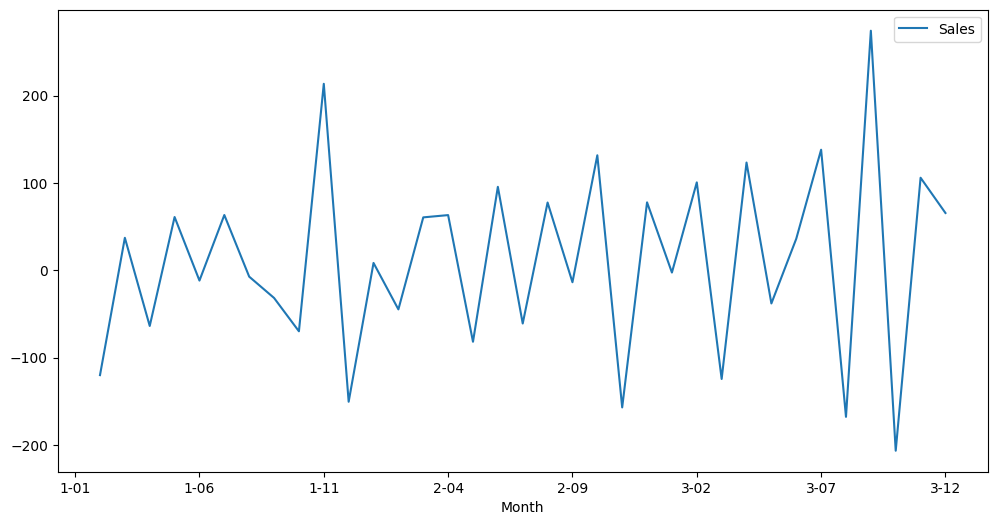

In [14]:
shampook = shampoo.diff()
shampook.plot(figsize=(12,6))

In the context of time series, `diff()` calculates the difference between consecutive data points. This process, called differencing, helps remove trends and seasonality, making the time series stationary so it can be used with models like ARIMA.

In [15]:
shampook.dropna(inplace=True)
adfuller(shampook['Sales'])

(np.float64(-7.249074055553854),
 np.float64(1.7998574141687034e-10),
 1,
 33,
 {'1%': np.float64(-3.6461350877925254),
  '5%': np.float64(-2.954126991123355),
  '10%': np.float64(-2.6159676124885216)},
 np.float64(275.32503579406307))

In this case, the p-value is extremely small, indicating strong evidence against the null hypothesis of non-stationarity, meaning the differenced series is stationary.

## ARIMA

ARIMA components in simple terms:

*   **Autoregression (AR(p))**: Think of this as using past values of the time series to predict the current value.  It's like saying, "What happened yesterday helps predict what will happen today." The 'p' tells you how many past values to consider.
*   **Integrated (I(d))**: This part deals with making a non-stationary time series stationary by "differencing" it. Differencing involves subtracting a past observation from the current one. The 'd' indicates how many times you need to difference to make it stationary.
*   **Moving Average (MA(q))**: This component uses past forecast errors to predict the current value. It's like saying, "If our prediction was off yesterday, how can we adjust today's prediction based on that error?" The 'q' tells you how many past errors to consider.

Autoregression - AR(p): Y = B0 + B1*Y_lag1 + B2*Y_lag2 + ... + Bn*Y_lagn

Integrated - I(d): Y_forward1 - Y = B0 + B1(Y - Y_lag1) + B2(Y_lag1 - Y_lag2)
+..

Moving Average - MA(q): Y = B0 + B1E_lag1 + B2E_lag2 + ... + Bn*E_lagn

## Back to Sunspot example...

<Axes: xlabel='Date'>

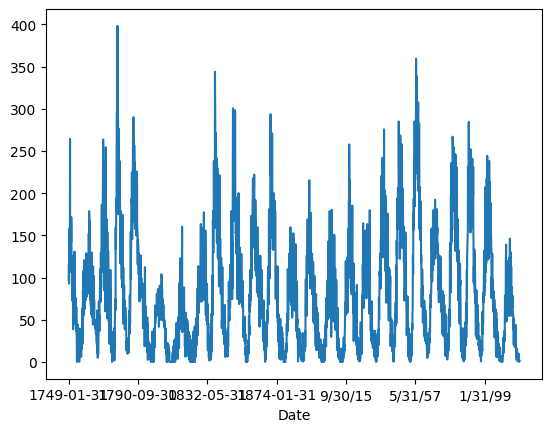

In [16]:
solar['Sunspot'].plot()

**Autocorrelation Function (ACF):**

The ACF measures the correlation between a time series and its lagged values at different time lags. In simple terms, it tells you how much the current value of a time series is correlated with its past values.

*   A significant spike at a particular lag in the ACF plot indicates that the time series is correlated with itself at that lag.
*   The ACF helps identify the order of the Moving Average (MA) component (q) in an ARIMA model.

**Partial Autocorrelation Function (PACF):**

The PACF measures the correlation between a time series and its lagged values, while removing the influence of the intermediate lags. It helps isolate the direct correlation between the current value and a specific lagged value.

*   A significant spike at a particular lag in the PACF plot indicates a direct correlation between the current value and the value at that lag, after accounting for correlations at shorter lags.
*   The PACF helps identify the order of the Autoregressive (AR) component (p) in an ARIMA model.

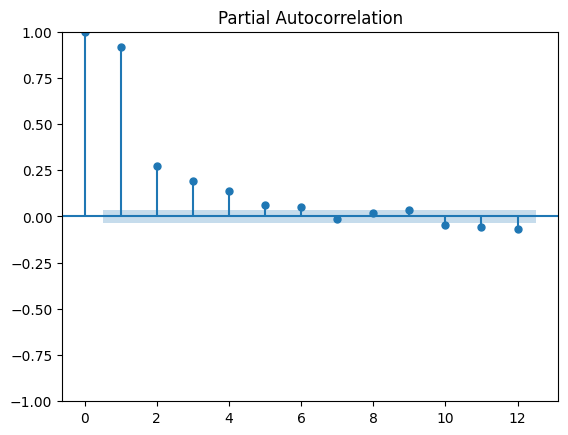

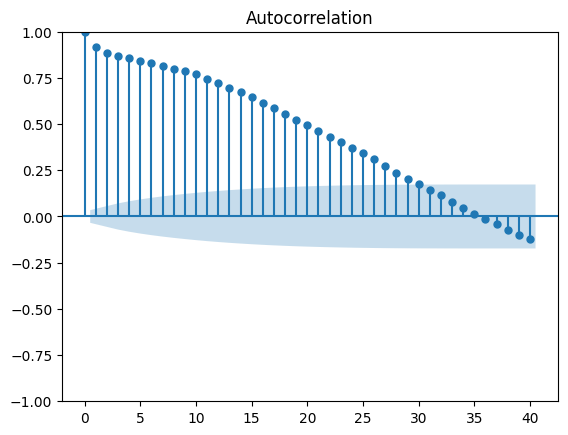

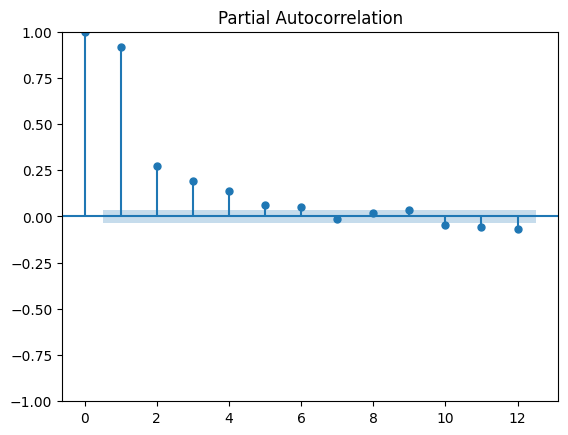

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(solar,lags=40)
plot_pacf(solar,lags=12)

### ARIMA = (4,0,1)

4.258312109546154
5.834637742092482
7.114485231577575
8.368239546766972
9.685314725006435
10.998519267938093
12.280368177142009
13.531413504008071
14.75877261534427
15.964813276770869
17.149375735710763
18.3122528611323
19.453752637375416
20.57435247316384
21.674482229252142
22.754514944495284
23.814808263261135
24.855719714666428
25.877604605556193
26.880811474480396


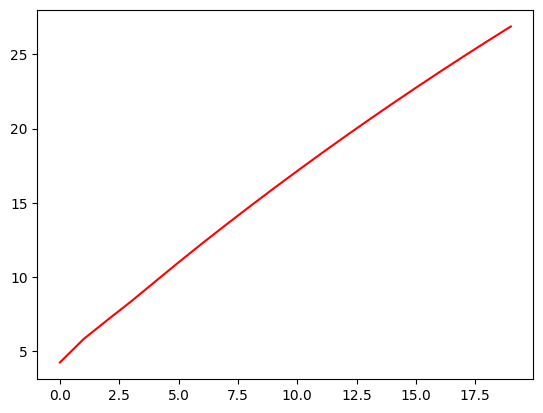

In [22]:
sol = [x for x in solar['Sunspot']]

from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

prevs = list()
for t in range(20):
  arima = ARIMA(sol, order=(4,0,1) )
  modelo =  arima.fit()
  out = modelo.forecast()
  yhat = out[0]
  prevs.append(yhat)
  sol.append(yhat)
  print(yhat)

plt.plot(prevs,color='red')


## Auto ARIMA

Auto ARIMA is a function that automatically discovers the optimal order for an ARIMA model. It does this by searching through a range of possible (p, d, q) combinations and selecting the one that minimizes a chosen information criterion, such as AIC or BIC. This automates the process of identifying the appropriate model parameters, which can be time-consuming when done manually by analyzing ACF and PACF plots.

In [4]:
!pip install pmdarima

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
  Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.7 MB/s eta 0:00:00
Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 105.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.3 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.3 

In [8]:
import pmdarima as pm
model=pm.auto_arima(solar['Sunspot'],m=11,seasonal=True,start_q=0,start_p=0,max_order=5,error_action='ignore',stepwise=True,trace=True)





```
ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=30209.536, Time=0.82 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 6.288 seconds
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3252
Model:               SARIMAX(1, 0, 2)   Log Likelihood              -15098.879
Date:                Tue, 14 Oct 2025   AIC                          30207.757
Time:                        18:01:33   BIC                          30238.192
Sample:                             0   HQIC                         30218.660
                               - 3252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.4076      0.492      2.864      0.004       0.444       2.371
ar.L1          0.9827      0.004    278.214      0.000       0.976       0.990
ma.L1         -0.4063      0.014    -29.570      0.000      -0.433      -0.379
ma.L2         -0.1141      0.014     -8.353      0.000      -0.141      -0.087
sigma2       631.0255      9.954     63.397      0.000     611.517     650.534
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1776.83
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                             0.64
Prob(H) (two-sided):                  0.43   Kurtosis:                         6.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
```

